# Project Akhir Data Science

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, mean_absolute_error, mean_squared_error, r2_score

import os
import warnings
import time

In [2]:
df = pd.read_csv('datasets/crop_datasets.csv')
df.head()

,Rainfall,Temperature,Ph,Crop,Production
0,400.15082,20.0,3.0,Bajra,0.00690
1,400.16331,20.0,3.2,Bajra,0.00747
2,400.16387,20.0,3.2,Bajra,0.00749
3,400.17967,20.0,3.2,Bajra,0.00822
4,400.19582,20.0,3.2,Bajra,0.00895


## Data Preparation

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 189232 entries, 0 to 189231
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0    Rainfall     189232 non-null  float64
 1    Temperature  189232 non-null  float64
 2    Ph           189232 non-null  float64
 3   Crop          189232 non-null  object 
 4    Production   189232 non-null  float64
dtypes: float64(4), object(1)
memory usage: 7.2+ MB


In [4]:
# Rename columns
df.rename(columns={' Rainfall': 'rainfall', ' Temperature': 'temperature', ' Ph': 'ph', 'Crop': 'crop', ' Production': 'production'}, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 189232 entries, 0 to 189231
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   rainfall     189232 non-null  float64
 1   temperature  189232 non-null  float64
 2   ph           189232 non-null  float64
 3   crop         189232 non-null  object 
 4   production   189232 non-null  float64
dtypes: float64(4), object(1)
memory usage: 7.2+ MB


In [5]:
df.describe()

,rainfall,temperature,ph,production
count,189232.000000,189232.000000,189232.000000,189232.000000
mean,693.417573,25.262492,6.337846,5.262677
std,288.988419,4.585660,0.788959,14.441616
min,100.003400,7.000000,3.000000,0.000340
25%,516.000000,22.026830,5.800000,0.584420
50%,628.702885,25.000000,6.300000,1.166670
75%,770.000000,28.215000,6.900000,2.989630
max,3000.000000,39.045000,8.800000,955.750340


### Explore unique values in the 'Crop' column

In [6]:
print("Unique Crops:")
print(df['crop'].unique())

Unique Crops:
['Bajra' 'Banana' 'Barley' 'Bean' 'Black pepper' 'Blackgram'
 'Bottle Gourd' 'Brinjal' 'Cabbage' 'Cardamom' 'Carrot' 'Castor seed'
 'Cauliflower' 'Chillies' 'Colocosia' 'Coriander' 'Cotton' 'Cowpea'
 'Drum Stick' 'Garlic' 'Ginger' 'Gram' 'Grapes' 'Groundnut' 'Guar seed'
 'Horse-gram' 'Jowar' 'Jute' 'Khesari' 'Lady Finger' 'Lentil' 'Linseed'
 'Maize' 'Mesta' 'Moong(Green Gram)' 'Moth' 'Onion' 'Orange' 'Papaya'
 'Peas & beans (Pulses)' 'Pineapple' 'Potato' 'Raddish' 'Ragi' 'Rice'
 'Safflower' 'Sannhamp' 'Sesamum' 'Soyabean' 'Sugarcane' 'Sunflower'
 'Sweet potato' 'Tapioca' 'Tomato' 'Turmeric' 'Urad' 'Varagu' 'Wheat']


### Visualize the distribution of numerical features

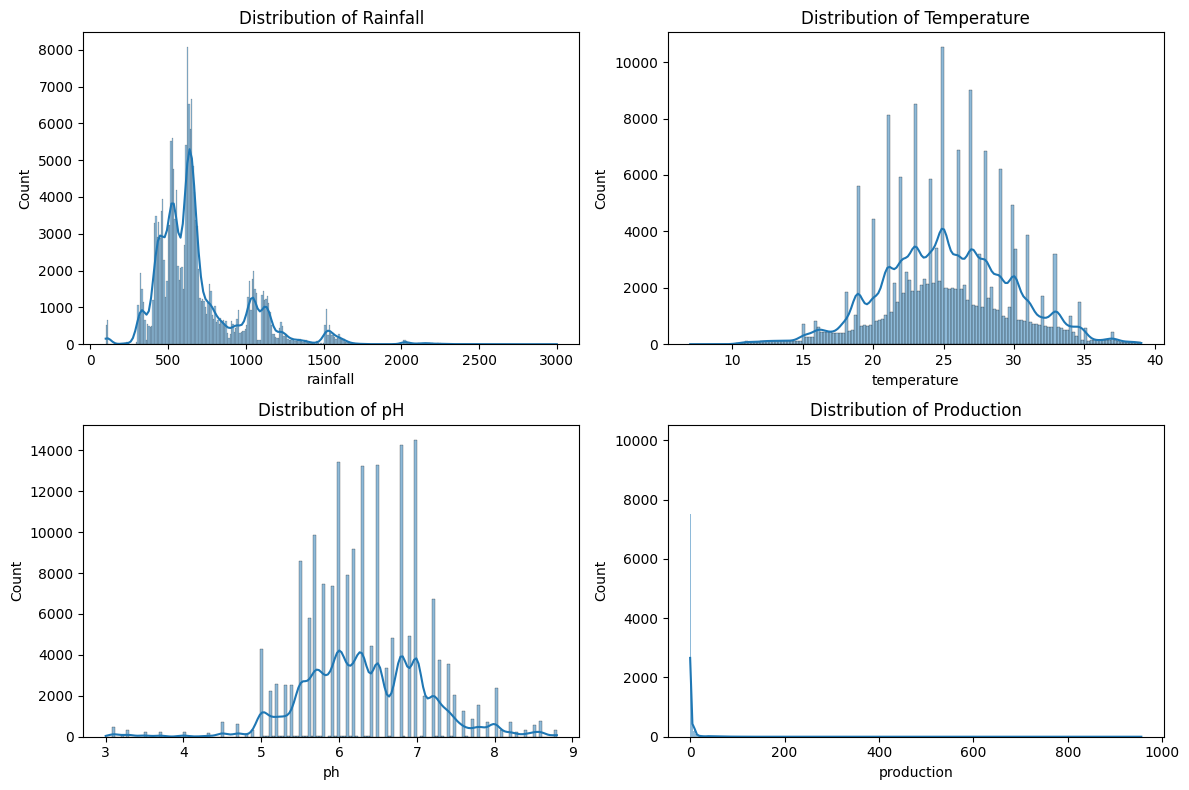

In [7]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
sns.histplot(df['rainfall'], kde=True)
plt.title('Distribution of Rainfall')

plt.subplot(2, 2, 2)
sns.histplot(df['temperature'], kde=True)
plt.title('Distribution of Temperature')

plt.subplot(2, 2, 3)
sns.histplot(df['ph'], kde=True)
plt.title('Distribution of pH')

plt.subplot(2, 2, 4)
sns.histplot(df['production'], kde=True)
plt.title('Distribution of Production')

plt.tight_layout()
plt.show()

- Curah hujan memiliki distribusi yang tidak merata, dengan nilai tertinggi berada di sekitar 2500-3000 mm.

- Suhu memiliki distribusi yang lebih merata, dengan nilai tertinggi berada di sekitar 25-30 derajat Celcius.

- pH memiliki distribusi yang tidak merata, dengan nilai tertinggi berada di sekitar 7.

- Produksi memiliki distribusi yang tidak merata, dengan nilai tertinggi berada di sekitar 800-1000.

### Visualize the relationship between features and the target variable

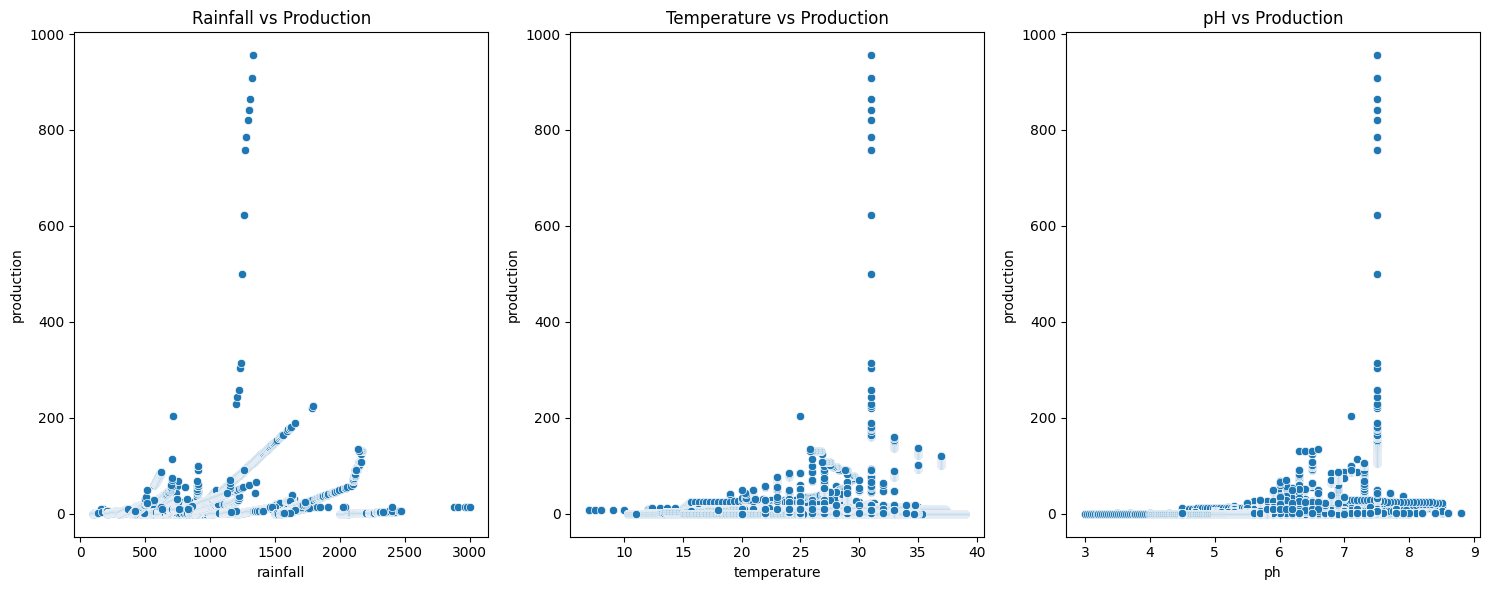

In [8]:
plt.figure(figsize=(15, 6))

plt.subplot(1, 3, 1)
sns.scatterplot(x='rainfall', y='production', data=df)
plt.title('Rainfall vs Production')

plt.subplot(1, 3, 2)
sns.scatterplot(x='temperature', y='production', data=df)
plt.title('Temperature vs Production')

plt.subplot(1, 3, 3)
sns.scatterplot(x='ph', y='production', data=df)
plt.title('pH vs Production')

plt.tight_layout()
plt.show()

### Explore correlations between numerical features

<ipython-input-9-1a35ed39b4cd>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


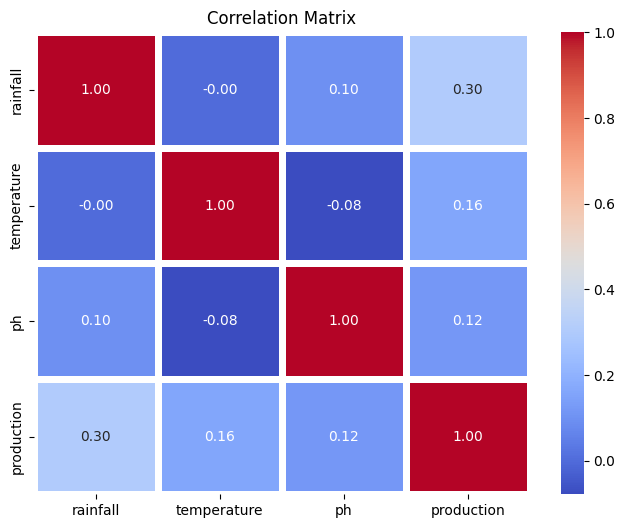

In [9]:
correlation_matrix = df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=5)
plt.title('Correlation Matrix')
plt.show()

> Berdasarkan hasil visualisasi, dapat disimpulkan bahwa terdapat korelasi positif yang kuat antara curah hujan dan produksi. Artinya, semakin tinggi curah hujan, semakin tinggi pula produksi. Korelasi negatif yang kuat juga ditemukan antara suhu dan produksi. Artinya, semakin tinggi suhu, semakin rendah pula produksi. Korelasi yang lebih lemah ditemukan antara pH dan produksi. Artinya, pH memiliki pengaruh yang lebih kecil terhadap produksi dibandingkan curah hujan dan suhu.

## Data Preprocesing

### Encode Categorical Variable 'Crop'

In [10]:
label_encoder = LabelEncoder()
df['crop'] = label_encoder.fit_transform(df['crop'])

In [11]:
df['crop'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57])

In [12]:
# Decode the encoded values back to original
decoded_crop_values = label_encoder.inverse_transform(df['crop'].values)

# Compare original and decoded values
comparison_df = pd.DataFrame({
    'Original Crop': decoded_crop_values,
    'Encoded Crop': df['crop'].values
})

# Display only unique rows
unique_comparison_df = comparison_df.drop_duplicates()

# Display the unique comparison
unique_comparison_df.head(58)

,Original Crop,Encoded Crop
0,Bajra,0
5223,Banana,1
8311,Barley,2
12345,Bean,3
12365,Black pepper,4
13232,Blackgram,5
13326,Bottle Gourd,6
13334,Brinjal,7
13593,Cabbage,8
13663,Cardamom,9


### Handling Outliers using Isolation Forest

In [13]:
outlier_detector = IsolationForest(contamination=0.05)  # You can adjust the contamination parameter
outliers = outlier_detector.fit_predict(df)
df['outlier'] = outliers

# Remove rows with outliers
df = df[df['outlier'] == 1].drop('outlier', axis=1)

# Display summary statistics for numerical columns after handling outliers
print(df.describe())

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


            rainfall    temperature             ph           crop  \
count  179779.000000  179779.000000  179779.000000  179779.000000   
mean      674.255361      25.207241       6.333361      34.517647   
std       257.516019       4.498681       0.727534      14.837092   
min       100.003400      10.300000       3.500000       0.000000   
25%       514.388180      22.045910       5.800000      23.000000   
50%       626.744190      25.000000       6.300000      34.000000   
75%       744.577755      28.050000       6.800000      47.000000   
max      2060.625000      39.045000       8.800000      57.000000   

          production  
count  179779.000000  
mean        3.671192  
std         8.065941  
min         0.000340  
25%         0.573430  
50%         1.118790  
75%         2.600000  
max        74.043480  


### Calculate the correlation matrix

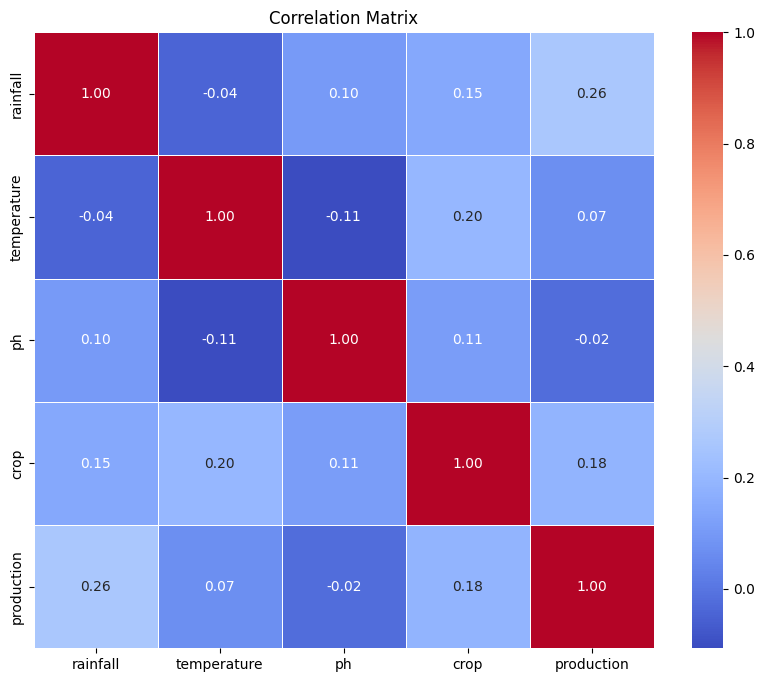

Highly Correlated Features Removed: set()
Remaining Features: Index(['rainfall', 'temperature', 'ph', 'crop', 'production'], dtype='object')


In [14]:
correlation_matrix = df.corr()

# Visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

# Identify and remove highly correlated features (threshold set to 0.8)
threshold = 0.8
highly_correlated = set()
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            colname = correlation_matrix.columns[i]
            highly_correlated.add(colname)

# Drop highly correlated features
df_filtered = df.drop(columns=highly_correlated)
print("Highly Correlated Features Removed:", highly_correlated)
print("Remaining Features:", df_filtered.columns)

### Separate features (X) and target variable (y)

#### Clasification

In [15]:
X = df_filtered.drop(['crop', 'production'], axis=1)
y = df_filtered['crop']

X.head()

,rainfall,temperature,ph
1182,413.78619,25.6,3.5
1183,413.78761,24.4,3.7
1184,413.78884,26.0,3.7
1185,413.79388,26.0,3.7
1186,413.80007,26.0,3.7


In [16]:
X.shape, y.shape

((179779, 3), (179779,))

#### Regresion

In [17]:
y_reg = df['production']

In [18]:
y_reg.shape

(179779,)

### Standardize numerical features

In [19]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_scaled

array([[-1.01147065,  0.08730562, -3.89448532],
       [-1.01146514, -0.17943997, -3.61958313],
       [-1.01146036,  0.17622082, -3.61958313],
       ...,
       [ 0.37180174,  0.17622082, -0.3207569 ],
       [-0.15696454, -0.71293115, -0.18330581],
       [ 0.33765321, -0.71293115, -0.18330581]])

### Split the data into training and testing sets

#### Clasification

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

#### Regresion

In [21]:
X_reg_train, X_reg_test, y_reg_train, y_reg_test = train_test_split(X_scaled, y_reg, test_size=0.2, random_state=42)

## Modeling

### Clasification

In [22]:
# Create a KNN classifier
knn_classifier = KNeighborsClassifier(n_neighbors=3)

# Train the model on the training set
knn_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn_classifier.predict(X_test)

### Regresion

In [23]:
# Create a KNN regresion
knn_regressor = KNeighborsRegressor(n_neighbors=3)

# Train the model on the training set
knn_regressor.fit(X_reg_train, y_reg_train)

# Make predictions on the test set
y_reg_pred = knn_regressor.predict(X_reg_test)

## Model Evaluation

### Evaluation Clasification Model

In [24]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred) * 100
precision = precision_score(y_test, y_pred, average='weighted', zero_division=1)
recall = recall_score(y_test, y_pred, average='weighted', zero_division=1)
f1 = f1_score(y_test, y_pred, average='weighted', zero_division=1)

# Print the evaluation metrics
print(f"Accuracy: {accuracy:.2f}%")
print(f"\nPrecision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

Accuracy: 99.65%

Precision: 0.9965
Recall: 0.9965
F1-Score: 0.9964


In [25]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Print Confusion Matrix
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[ 804    0    0 ...    0    0    0]
 [   0  163    0 ...    0    0    0]
 [   0    0  679 ...    0    0    0]
 ...
 [   0    0    0 ... 1899    0    0]
 [   0    0    0 ...    0   12    0]
 [   0    0    0 ...    1    0 1515]]


In [26]:
# Classification Report
class_report = classification_report(y_test, y_pred, zero_division=1)

# Print Classification Report
print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       806
           1       0.98      0.99      0.99       164
           2       1.00      1.00      1.00       681
           3       1.00      0.00      0.00         2
           4       1.00      1.00      1.00        77
           5       0.68      0.65      0.67        20
           7       0.98      0.91      0.95        47
           8       0.75      0.38      0.50         8
          11       0.99      0.98      0.98       546
          13       1.00      1.00      1.00      1227
          14       1.00      0.17      0.29         6
          15       1.00      1.00      1.00       555
          16       1.00      1.00      1.00       794
          17       0.97      1.00      0.99       107
          18       1.00      1.00      1.00        15
          19       1.00      1.00      1.00       631
          20       1.00      1.00      1.00       616
    

### Evaluation Regresion Model

In [27]:
# Evaluasi model regresi
mae = mean_absolute_error(y_reg_test, y_reg_pred)
mse = mean_squared_error(y_reg_test, y_reg_pred)
r2 = r2_score(y_reg_test, y_reg_pred)

# Print evaluasi
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R-squared (R²): {r2:.4f}")

Mean Absolute Error (MAE): 0.0245
Mean Squared Error (MSE): 0.2262
R-squared (R²): 0.9965


## Testing

In [28]:
def predict_crop(knn_classifier, knn_regressor, label_encoder, scaler):
    while True:
        try:
            # Meminta pengguna memasukkan nilai untuk setiap kolom
            rainfall = float(input("Masukkan nilai Rainfall: "))
            temperature = float(input("Masukkan nilai Temperature: "))
            ph = float(input("Masukkan nilai Ph: "))
        except ValueError:
            print("Mohon masukkan nilai numerik yang valid.")
            continue

        warnings.filterwarnings("ignore", category=UserWarning)

        # Menambahkan nilai ke dalam list 'new_data'
        new_data = [[rainfall, temperature, ph]]

        # Normalisasi data baru mengunakan scaler yang sudah diterapkan sebelumnya
        new_data_normalized = scaler.transform(new_data)

        # Prediksi kelas menggunakan model KNN
        predicted_class = knn_classifier.predict(new_data_normalized)

        # Mengembalikan label kelas ke nilai semula jika 'Crop' adalah kelas yang diprediksi
        predicted_crop = label_encoder.inverse_transform(predicted_class)

        # Prediksi hasil produksi menggunakan model regresi KNN
        predicted_production = knn_regressor.predict(new_data_normalized)

        # Efek animasi sederhana
        print("\nMemprediksi", end="", flush=True)
        for _ in range(3):
            time.sleep(1)
            print(".", end="", flush=True)
        print("\n")

        # Menampilkan hasil prediksi
        print(f"\nPredicted Crop: {predicted_crop[0]}")
        print(f"Predicted Production: {predicted_production[0]}")
        warnings.filterwarnings("default", category=UserWarning)

        process = input("\nApakah anda ingin melanjutkan? jika tidak ketik 'selesai' untuk mengakhiri: ")
        # Periksa jika pengguna memilih untuk keluar dari program
        if process.lower() == 'selesai':
            print("Program selesai.")
            break

In [29]:
predict_crop(knn_classifier, knn_regressor, label_encoder, scaler)

Masukkan nilai Rainfall: 400
Masukkan nilai Temperature: 40
Masukkan nilai Ph: 7

Memprediksi...


Predicted Crop: Jute
Predicted Production: 8.956926666666668

Apakah anda ingin melanjutkan? jika tidak ketik 'selesai' untuk mengakhiri: selesai
Program selesai.
